In [0]:
# Convolutional Neural Network
# Data that doesn't align into columns
# Images, machine translation,sentence classification, sentiment analysis
# Source data needs proper dimensions (e.g. width*height*colour channels)
# Conv2D layer convulates a 2D layer
# MaxPool2D layes reduce data by taking a max value in a block
# Flattening will convert 2D to 1D to pass to hidden layers
# Usually Conv2D -> MaxPooling2D -> Dropout -> Flatten -> Dense -> Dropout -> Softmax

In [0]:
# CNN with MNIST
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import backend as K

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Unlike Keras example, we can use 28*28 pixel images as they are.
# We're using 1*28*28 as it's greyscale. If colour, use 3 for red,green,blue
if K.image_data_format() == 'channels_first':
  trainImages = mnist_train_images.reshape(mnist_train_images.shape[0],1,28,28)
  testImages = mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
  inputShape = (1,28,28)
else:
  trainImages = mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
  testImages = mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
  inputShape = (28,28,1)

trainImages = trainImages.astype('float32')
testImages = testImages.astype('float32')
trainImages /= 255
testImages /= 255

In [0]:
# Convert labels to one hot
trainLabels = tf.keras.utils.to_categorical(mnist_train_labels,10)
testLabels = tf.keras.utils.to_categorical(mnist_test_labels,10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


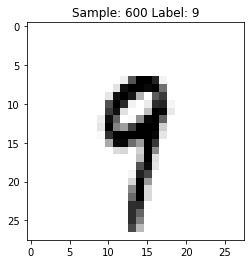

In [12]:

# Visualise training images
def displayImage(number):
  # Check one hot array of image label
  print(trainLabels[number])
  # Convert label bact to 0-9
  label = trainLabels[number].argmax(axis=0)
  # Reshape 1D tensor (768 pixels) into 28*28 image
  image = trainImages[number].reshape([28,28])
  # Show image
  plt.title('Sample: %d Label: %d' % (number, label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()

displayImage(600)

In [17]:
# Build thr model
model = Sequential()
# 32 kernels size 3*3. Kernel is a filter used to extract features from an image
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=inputShape))
model.add(Conv2D(64,(3,3),activation='relu'))
# Reduce 2*2 pixel block to a single pixel, represents max pixel found
model.add(MaxPool2D(pool_size=(2,2)))
# Reduce neurons to prevent overfitting
model.add(Dropout(0.25))
# Flatten result to 1D to pass to final layer
model.add(Flatten())
# Hidden layer for learning
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
# Classify from 0-9 with softmax
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.fit(trainImages,trainLabels,batch_size=32,epochs=10,verbose=2,validation_data=(testImages,testLabels))

Epoch 1/10
1875/1875 - 13s - loss: 0.1844 - accuracy: 0.9437 - val_loss: 0.0432 - val_accuracy: 0.9864
Epoch 2/10
1875/1875 - 13s - loss: 0.0795 - accuracy: 0.9766 - val_loss: 0.0422 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 - 13s - loss: 0.0622 - accuracy: 0.9813 - val_loss: 0.0320 - val_accuracy: 0.9900
Epoch 4/10
1875/1875 - 13s - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0256 - val_accuracy: 0.9918
Epoch 5/10
1875/1875 - 13s - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0283 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 - 13s - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0268 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 - 13s - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0287 - val_accuracy: 0.9916
Epoch 8/10
1875/1875 - 13s - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0315 - val_accuracy: 0.9905
Epoch 9/10
1875/1875 - 13s - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0376 - val_accuracy: 0.9905
Epoch 10/10
1875/1875 - 13s - loss: 0.0242 - accuracy: 0.9922 - val_loss:

In [21]:
# Check the accuracy and loss
accuracyScoring = model.evaluate(testImages,testLabels,verbose=0)
print('Test Loss: ',accuracyScoring[0])
print('Test Accuracy: ',accuracyScoring[1])

Test Loss:  0.028723398223519325
Test Accuracy:  0.9918000102043152
